In [1]:
Q-1.) Imagine you have a dataset where you have different Instagram features 
    like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
    to predict the number of likes and Time Since posted and the rest of the features are
    your input features. Now you have to build a model which can predict the
    number of likes and Time Since posted.
    
    Dataset Url = "https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach"
    
    This is the Dataset You can use this dataset for this question.

In [100]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
df = pd.read_csv("C:\\Users\\aniyant\\python\\Ineuron\\DATA SCIENCE ASSIGNMENT\\Machine-Learning-Interview-Assignments\\question-01\\instagram_reach.csv")

## Data Cleaning

In [102]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [103]:
# Don't need two columns so droping them
df.drop(columns=['Unnamed: 0','S.No'],axis=1,inplace=True)

In [104]:
df.head(10)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
5,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18
6,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35
7,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86
8,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22
9,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18


In [105]:
df.shape

(100, 6)

In [106]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [107]:
# Converting columns names to lowercase for ease
df.columns = df.columns.str.lower()

## EDA

In [108]:
df.columns

Index(['username', 'caption', 'followers', 'hashtags', 'time since posted',
       'likes'],
      dtype='object')

In [109]:
df.isnull().sum()

username             0
caption              6
followers            0
hashtags             0
time since posted    0
likes                0
dtype: int64

#### caption feature have 6 null values

In [110]:
df[df.caption.isnull() == True] 

,username,caption,followers,hashtags,time since posted,likes
52,opensourcedworkplace,NaN,348,#HR #workplace#officedesign #iot #bigdata #off...,4 hours,17
67,remi_ole,NaN,2175,#entrepreneur #entrepreneurial#entrepreneurmin...,2 hours,41
72,kamalalshehabi,NaN,955,#qoute #success#motivation #entrepreneur #insp...,2 hours,20
79,anandvanjape,NaN,460,#Designer #style #artist#brand #logo #monogram...,2 hours,29
85,monde_informatique,NaN,2455,monde_informatique#client #project#product #pr...,3 hours,24
89,inmemovement,NaN,1196,#INME #inmemovement#indianeedsmoreentrepreneur...,2 hours,16


#### There are the null records of caption

In [111]:
df.dropna()

,username,caption,followers,hashtags,time since posted,likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [112]:
df.isnull().sum()

username             0
caption              6
followers            0
hashtags             0
time since posted    0
likes                0
dtype: int64

In [113]:
df.dtypes

username             object
caption              object
followers             int64
hashtags             object
time since posted    object
likes                 int64
dtype: object

In [114]:
df.describe()

,followers,likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


##### Insights: 1.average followers is 961 and average of likes is 46
#####                 2. max likes is 349 and min 8
    

In [117]:
df.dtypes

username             object
caption              object
followers             int64
hashtags             object
time since posted    object
likes                 int64
dtype: object

In [118]:
# segragating categorical columns
cat_features = [c for c in df.columns if df[c].dtype == 'object']
cat_features

['username', 'caption', 'hashtags', 'time since posted']

In [119]:
# segragating categorical columns
num_features = [c for c in df.columns if df[c].dtype == 'int64']
num_features

['followers', 'likes']

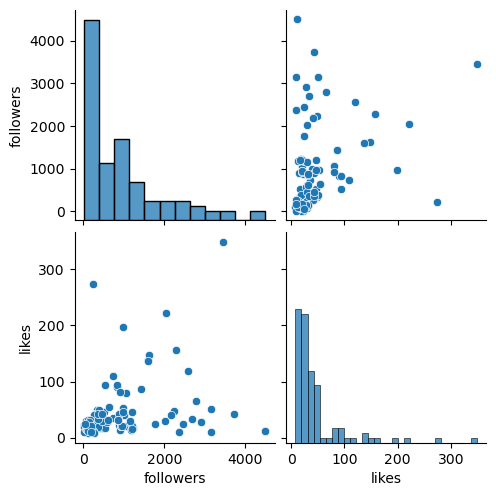

In [120]:
# checking the numerical features
sns.pairplot(data = df)

#### Insights : user has higher followers have more number of likes

<AxesSubplot:ylabel='Density'>

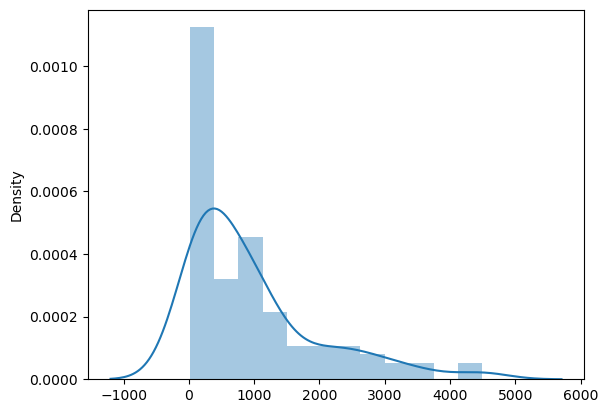

In [121]:
sns.distplot(x=df.followers)

#### Insights : follower feature is positively or rightly skewed

In [122]:
# checking skewnes of followers
df.followers.skew()

1.614206262408713

In [208]:
# using cube root transformation for followers feature to reduce skewness
df['follower_cubic_r'] = df['followers'].apply(lambda a : np.power(a, (1/3)))
df['follower_cubic_r'].skew()

0.3335525372475296

<AxesSubplot:xlabel='follower_cubic_r', ylabel='Density'>

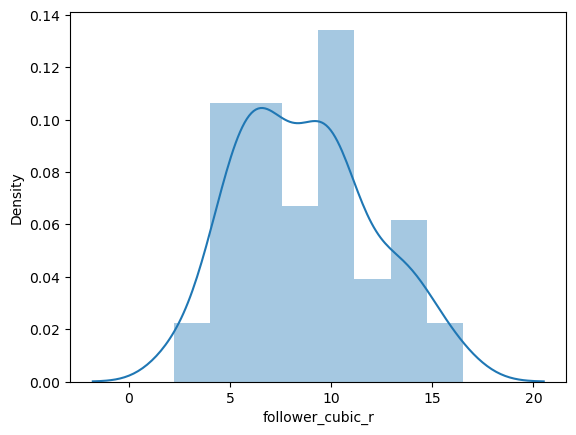

In [125]:
# dist plot
sns.distplot(df['follower_cubic_r'])

#### observation : Less skew now than before

<AxesSubplot:>

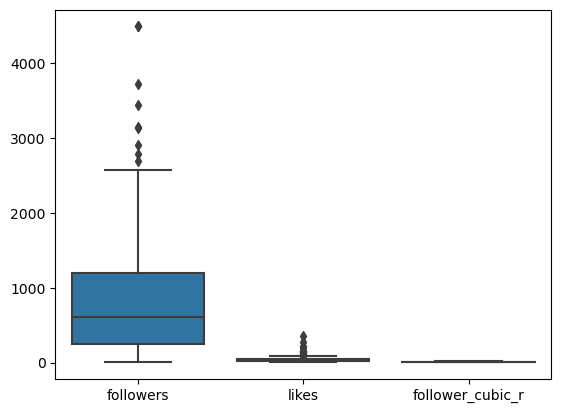

In [126]:
sns.boxplot(data = df)

#### Insights : followers features have some outliers but follower_cubic_r has no so we will take this one


In [207]:
# Correlation 
df.corr()

,followers,likes,follower_cubic_r
followers,1.000000,0.266218,0.934401
likes,0.266218,1.000000,0.310004
follower_cubic_r,0.934401,0.310004,1.000000


<AxesSubplot:>

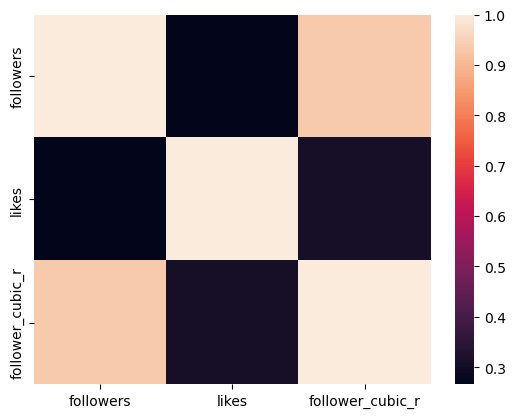

In [206]:
# Correlation using heatmap
sns.heatmap(df.corr())

#### followers and likes are positively correleated

In [129]:
len(df.username.unique())

95

In [130]:
len(df.caption.unique())

95

In [131]:
for f in cat_features:
    print(f,' : ',len(df[f].value_counts()))

username  :  95
caption  :  94
hashtags  :  98
time since posted  :  11


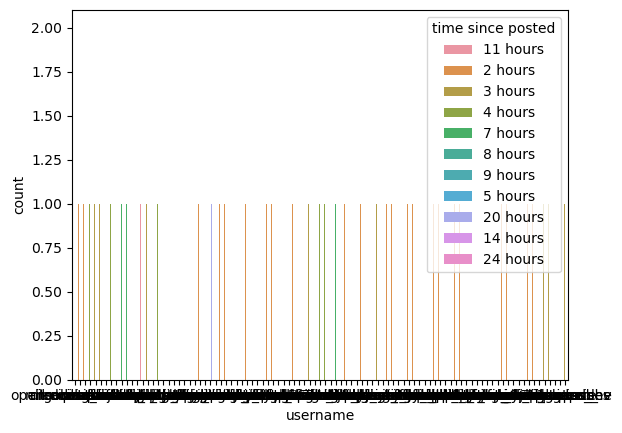

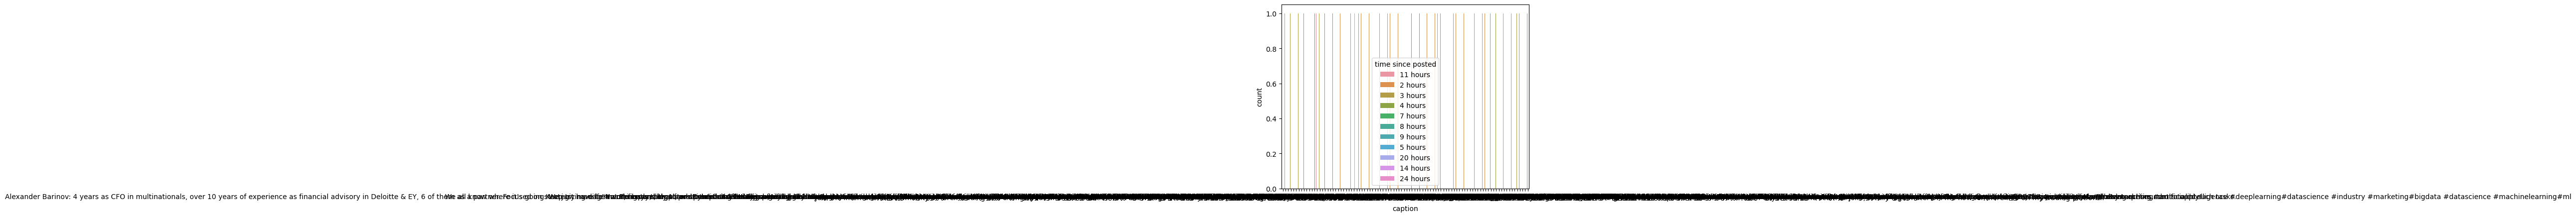

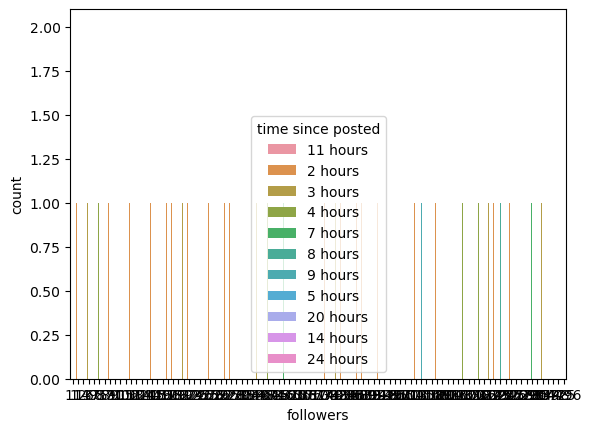

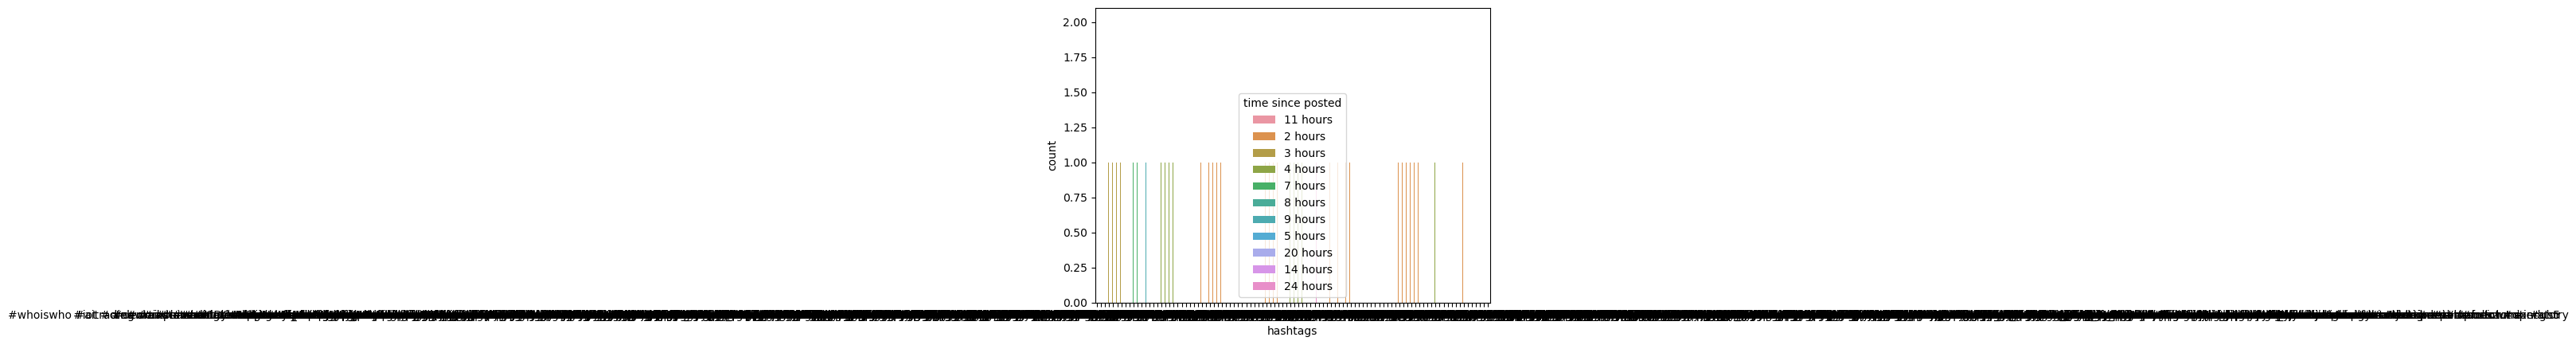

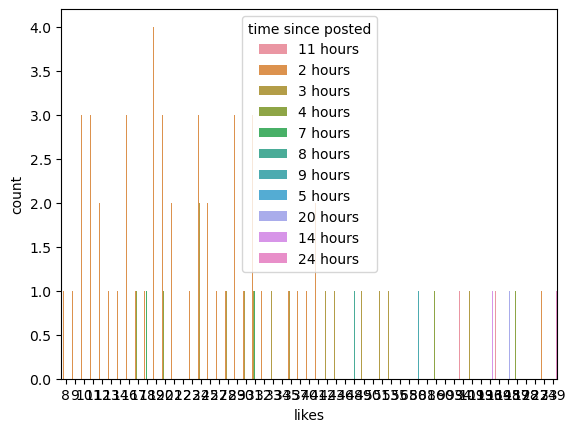

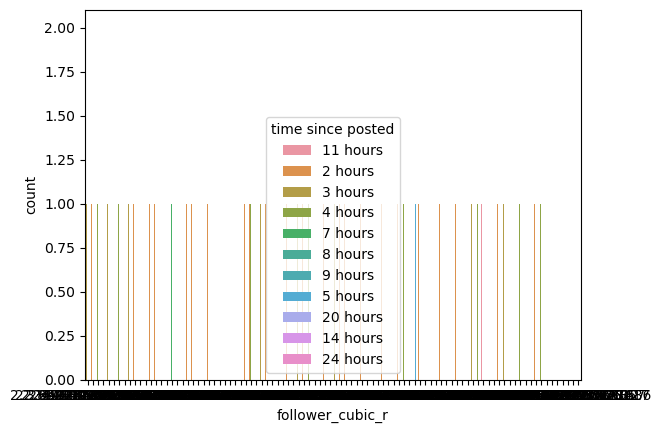

In [133]:
for i, predictor in enumerate(df.drop(columns=['time since posted',])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='time since posted')

### FEATURE SELECTION

In [142]:
df.head()

,username,caption,followers,hashtags,time since posted,likes,follower_cubic_r
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11.696071
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,9.582840
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,6.341326
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,6.979532
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,6.723951


In [201]:
# one hot encoding of hashtag feature
hashtags_encode = df.hashtags.str.get_dummies(sep='#')
hashtags_encode

.  100daysofcode  100daysofcode   2018   365daysofcode   38mm   3d   \
0   0  0              0               0      0               0      0    0   
1   0  0              0               0      0               0      0    0   
2   0  0              0               0      0               0      0    0   
3   0  0              0               0      0               0      0    0   
4   0  0              0               0      0               0      0    0   
.. .. ..            ...             ...    ...             ...    ...  ...   
95  0  0              0               0      0               0      0    0   
96  0  0              0               0      0               0      0    0   
97  0  0              0               0      0               0      0    0   
98  0  0              0               0      0               0      0    0   
99  0  0              0               0      0               0      0    0   

    AI  AI   AI   API  API   Ambition  Americanmade  Analytics  Analytics   \
0    0    1    0    0     0         0             0          0           0   
1    0    0    0    0     0         0             0          0           0   
2    0    0    0    0     0         0             0          0           0   
3    0    0    0    0     0         0             0          0           0   
4    0    0    0    0     0         0             0          0           0   
..  ..  ...  ...  ...   ...       ...           ...        ...         ...   
95   0    0    0    0     0         0             0          0           0   
96   0    0    0    0     0         0             0          0           0   
97   0    0    0    0     0         0             0          0           0   
98   0    0    0    0     0         0             1          0           0   
99   0    0    0    0     0         0             0          0           0   

    Android  AppleDesign  AppleNews   Apple   Artificial   \
0         0            0           0       0            0   
1         0            0           0       0            0   
2         0            0           0       0            0   
3         0            0           0       0            0   
4         0            0           0       0            0   
..      ...          ...         ...     ...          ...   
95        0            0           0       0            0   
96        0            0           0       0            0   
97        0            0           0       0            0   
98        0            0           0       0            0   
99        0            0           0       0            0   

    ArtificialIntelligence  ArtificialIntelligence   ArtificialIntelligence   \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   
..                     ...                      ...                      ...   
95                       0                        0                        0   
96                       0                        0                        0   
97                       0                        0                        0   
98                       0                        0                        0   
99                       0                        0                        0   

    Atomos   BI   BTC  BeYourOwnBoss  Believe  BigData  BigData   BigData   \
0         0    0    0              0        0        0         0         0   
1         0    0    0              0        0        0         0         0   
2         0    0    0              0        0        0         0         0   
3         0    0    0              0        0        0         0         0   
4         0    0    0              0        0    

#### observation : It has 1429 columns - that's lot of columns we are droping this column we can use but it will neeed PCA

In [204]:
# One Hot Encoding of time since posted column
time_since_posted_encoded = df['time since posted'].str.get_dummies()
time_since_posted_encoded

,11 hours,14 hours,2 hours,20 hours,24 hours,3 hours,4 hours,5 hours,7 hours,8 hours,9 hours
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,1,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0,0
97,0,0,0,0,0,1,0,0,0,0,0
98,0,0,0,0,0,1,0,0,0,0,0


#### observation : It has 11 columns after encoding

In [205]:
# One hot encoding
caption_encoded = df['caption'].str.get_dummies(sep=' ')
caption_encoded

!  !!  "  "If  "It  "VirtualHome,"  "agents"  #AI  #Artificial  \
0   0   0  0    0    0               0         0    1            0   
1   0   0  0    0    0               0         0    0            0   
2   0   0  0    0    0               0         0    0            0   
3   0   0  0    0    0               0         0    0            0   
4   0   0  0    0    0               0         0    0            0   
.. ..  .. ..  ...  ...             ...       ...  ...          ...   
95  0   0  0    0    0               0         0    0            0   
96  0   0  0    0    0               0         0    0            0   
97  1   1  0    0    0               0         0    0            0   
98  0   0  0    0    0               0         0    0            0   
99  0   0  0    0    0               0         0    0            0   

    #BigData#HealthTech  #DUBAI  #DataAnalytics  #DataLake  #DataScienc  \
0                     0       0               1          1            1   
1                     0       0               0          0            0   
2                     0       0               0          0            0   
3                     0       0               0          0            0   
4                     0       0               0          0            0   
..                  ...     ...             ...        ...          ...   
95                    0       0               0          0            0   
96                    0       0               0          0            0   
97                    0       0               0          0            0   
98                    0       0               0          0            0   
99                    0       0               0          0            0   

    #DataScientist  #DeepLearning  #IIoT  #Infographics  #Intelligence  #IoT  \
0                1              0      0              0              0     0   
1                0              0      0              0              0     0   
2                0              0      0              0              0     0   
3                0              0      0              0              0     0   
4                0              0      0              0              0     0   
..             ...            ...    ...            ...            ...   ...   
95               0              0      0              0              0     0   
96               0              0      0              0              0     0   
97               0              0      0              0              0     0   
98               0              0      0              0              0     0   
99               0              0      0              0              0     0   

    #MachineLearning  #MachineLearning#ArtificialIntelligence  #Mobile  \
0                  1                                        0        0   
1                  0                                        0        0   
2                  0                                        0        0   
3                  0                                        0        0   
4                  0                                        0        0   
..               ...                                      ...      ...   
95                 0                                        0        0   
96                 0                                        0        0   
97                 0                                        0        0   
98                 0                                        0        0   
99                 0                                        0        0   

    #Repost  #SkrappdaGawd New  #WorldCup is  #smartphones  \
0         0                  0             0             0   
1         0                  0             0             0   
2         0                  0             0             0   
3         0                  0             0             0   
4         0                  0             0             0   
..      ...                ...          

#### observation : It has 1223 columns after encoding - droping this caption column

## Feature Selection

In [153]:
df.columns

Index(['username', 'caption', 'followers', 'hashtags', 'time since posted',
       'likes', 'follower_cubic_r'],
      dtype='object')

In [157]:
features_select_df = df[['follower_cubic_r','likes','time since posted']]

In [158]:
features_select_df

,follower_cubic_r,likes,time since posted
0,11.696071,139,11 hours
1,9.582840,23,2 hours
2,6.341326,25,2 hours
3,6.979532,49,3 hours
4,6.723951,30,3 hours
...,...,...,...
95,8.499423,31,3 hours
96,7.663094,42,3 hours
97,5.667051,10,3 hours
98,12.680579,222,3 hours


### Model training and testing  - taking 'likes' as target var 

In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Separate the features (X) and the target variable (y)
X = pd.concat([features_select_df['follower_cubic_r'],time_since_posted_encoded],axis=1)
y = features_select_df['likes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# printing Accuracy score
print("Accuracy score: " ,rf.score(X_test,y_test))

# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

Accuracy score:  0.4049101191956279
Mean Squared Error: 843.6157800000001


### Model training and testing  - taking 'time since posted' as target var 

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


# Separate the features (X) and the target variable (y)
X = features_select_df.drop('time since posted',axis=1)
y = features_select_df['time since posted']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)


print("Accuracy score : ",rf.score(X_test,y_test))

# Evaluate the model using mean squared error (MSE)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

Accuracy score :  0.5
Confusion Matrix
[[ 0  0  0  1  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0 10  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]]
